In [101]:
import os

In [102]:
data_dir='C:\\Users\\Madhu\\Desktop\\Gesture\\Number_gestures'

In [103]:
os.listdir(data_dir)

['test', 'train']

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
from matplotlib.image import imread

In [149]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'
valid_path = data_dir+'\\valid\\'

In [107]:
test_path

'C:\\Users\\Madhu\\Desktop\\Gesture\\Number_gestures\\test\\'

In [108]:
os.listdir(test_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [109]:
os.listdir(train_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [110]:
os.listdir(train_path+'0')

['N_0_261.jpg',
 'N_0_262.jpg',
 'N_0_263.jpg',
 'N_0_264.jpg',
 'N_0_265.jpg',
 'N_0_266.jpg',
 'N_0_267.jpg',
 'N_0_268.jpg',
 'N_0_269.jpg',
 'N_0_270.jpg',
 'N_0_271.jpg',
 'N_0_272.jpg',
 'N_0_273.jpg',
 'N_0_274.jpg',
 'N_0_275.jpg',
 'N_0_276.jpg',
 'N_0_277.jpg',
 'N_0_278.jpg',
 'N_0_279.jpg',
 'N_0_280.jpg',
 'N_0_281.jpg',
 'N_0_282.jpg',
 'N_0_283.jpg',
 'N_0_284.jpg',
 'N_0_285.jpg',
 'N_0_286.jpg',
 'N_0_287.jpg',
 'N_0_288.jpg',
 'N_0_289.jpg',
 'N_0_290.jpg',
 'N_0_291.jpg',
 'N_0_292.jpg',
 'N_0_293.jpg',
 'N_0_294.jpg',
 'N_0_295.jpg',
 'N_0_296.jpg',
 'N_0_297.jpg',
 'N_0_298.jpg',
 'N_0_299.jpg',
 'N_0_300.jpg']

In [111]:
n_0=train_path+'0\\'+'N_0_261.jpg'


In [112]:
n_0

'C:\\Users\\Madhu\\Desktop\\Gesture\\Number_gestures\\train\\0\\N_0_261.jpg'

In [113]:
imread(n_0).shape

(400, 400, 3)

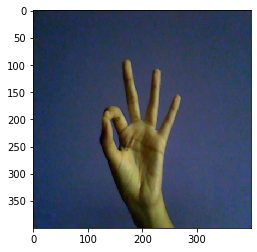

In [114]:
plt.imshow(imread(n_0))

In [115]:
len(os.listdir(train_path+'0'))

40

In [116]:
len(os.listdir(test_path+'0'))

20

In [117]:
# for images having different dimensions:

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'0'):
    
    img = imread(test_path+'0\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

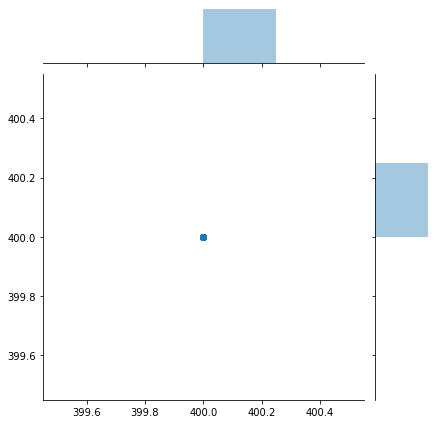

In [118]:
sns.jointplot(dim1,dim2)  #here images have the same dimension

In [119]:
image_shape=(400,400,3)

In [120]:
400*400*3

480000

### IMAGE DATA GENERATOR

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
#help(ImageDataGenerator)

In [123]:
#image_gen = ImageDataGenerator(rotation_range=20, width_shift_range= 0.1, height_shift_range=0.1,)
#used when malarial cells, etc are the dataset. For face recognition it is not recommended

In [124]:
image_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, fill_mode='nearest')

In [125]:
imread(n_0).max()

206

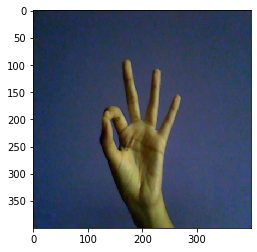

In [126]:
plt.imshow(imread(n_0))

In [127]:
n_0_img=imread(n_0)

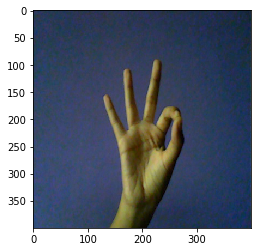

In [128]:
plt.imshow(image_gen.random_transform(n_0_img))

In [129]:
image_gen.flow_from_directory(train_path)

Found 361 images belonging to 9 classes.


In [130]:
os.listdir(train_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [131]:
image_gen.flow_from_directory(test_path)

Found 180 images belonging to 9 classes.


# CREATING MODEL

In [132]:
from keras.models import Sequential

In [133]:
import tensorflow as tf
!pip install -U tensorboard_plugin_profile


Requirement already up-to-date: tensorboard_plugin_profile in c:\users\madhu\anaconda3\lib\site-packages (2.4.0)


In [134]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [135]:
model1 = Sequential()
model1.add(Convolution2D(32, (3, 3), input_shape=(400,400, 3), padding='valid'))
model1.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Convolution2D(32, (3, 3), padding='valid'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

#model.add(Convolution2D(64, (3, 3), padding='valid'))
#model.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dense(32))
model1.add(Activation('relu'))

#model.add(Dropout(0.5))
model1.add(Dense(9))
model1.add(Activation('softmax'))

model1.compile('adam',loss='categorical_crossentropy',
              #optimizer='rmsprop',
              metrics=['accuracy'])


In [136]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 398, 398, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 396, 396, 32)      9248      
_________________________________________________________________
activation_11 (Activation)   (None, 396, 396, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 198, 198, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 32)       

In [137]:
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [139]:
batch_size=32

In [140]:
image_shape[:2]

(400, 400)

In [141]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical')

Found 361 images belonging to 9 classes.


In [142]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                              shuffle=False)

Found 180 images belonging to 9 classes.


In [150]:
valid_image_gen= image_gen.flow_from_directory(valid_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                              shuffle=False)

Found 271 images belonging to 9 classes.


In [143]:
train_image_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '7': 6, '8': 7, '9': 8}

In [144]:
logs = "logs"
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

results = model1.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[tboard_callback])

Epoch 1/20
12/12 [==============================] - 103s 9s/step - loss: 4.5460 - accuracy: 0.1191 - val_loss: 2.1987 - val_accuracy: 0.1111
Epoch 2/20
12/12 [==============================] - 104s 9s/step - loss: 2.0590 - accuracy: 0.2244 - val_loss: 2.3632 - val_accuracy: 0.3056
Epoch 3/20
12/12 [==============================] - 105s 9s/step - loss: 1.8621 - accuracy: 0.3380 - val_loss: 2.2148 - val_accuracy: 0.3111
Epoch 4/20
12/12 [==============================] - 105s 9s/step - loss: 1.4208 - accuracy: 0.5014 - val_loss: 2.1466 - val_accuracy: 0.5667
Epoch 5/20
12/12 [==============================] - 102s 8s/step - loss: 1.0360 - accuracy: 0.6565 - val_loss: 2.5201 - val_accuracy: 0.5000
Epoch 6/20
12/12 [==============================] - 100s 8s/step - loss: 0.5800 - accuracy: 0.7839 - val_loss: 4.3506 - val_accuracy: 0.3889
Epoch 7/20
12/12 [==============================] - 103s 9s/step - loss: 0.4076 - accuracy: 0.8144 - val_loss: 3.7714 - val_accuracy: 0.5444
Epoch 8/20
12

In [156]:
%load_ext tensorboard




In [157]:
%tensorboard --logdir=logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 10264.

In [145]:
metrics = pd.DataFrame(model1.history.history)

In [146]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,4.545986,0.119114,2.198710,0.111111
1,2.059045,0.224377,2.363173,0.305556
2,1.862121,0.337950,2.214839,0.311111
3,1.420834,0.501385,2.146630,0.566667
4,1.035985,0.656510,2.520114,0.500000
5,0.579957,0.783934,4.350594,0.388889
6,0.407561,0.814404,3.771365,0.544444
7,0.333238,0.844875,3.137355,0.616667
8,0.299342,0.867036,3.591074,0.544444
9,0.306394,0.847645,3.651543,0.605556


In [ ]:
#model.save('best_model.h5')

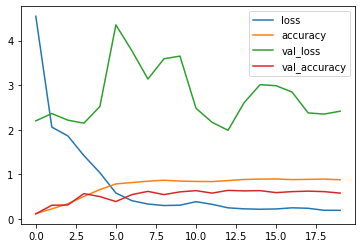

In [151]:
metrics.plot()

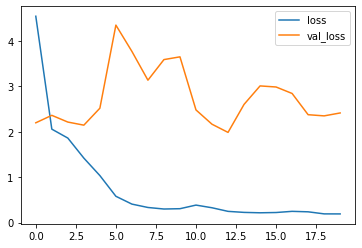

In [152]:
metrics[['loss','val_loss']].plot()

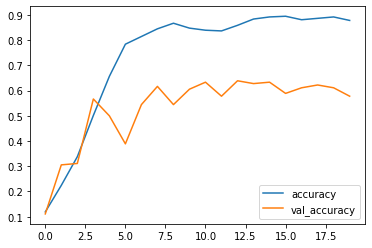

In [153]:
metrics[['accuracy','val_accuracy']].plot()

In [154]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
Y_pred = model1.predict_generator(valid_image_gen, 85)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_image_gen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3','4','5','7','8','9']
print(classification_report(valid_image_gen.classes, y_pred, target_names=target_names))


Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[17  0  1  1  0  5  0  6  1]
 [ 0 18  0  0  1  0  1  1  9]
 [ 0  9  0  0  0  0  2  0 19]
 [ 0  1  0  0 10  1  0  0 18]
 [ 0  4  0  0 22  0  0  0  4]
 [ 0  0  3  0 17  1  4  0  5]
 [ 1 19  0  0  7  0  2  0  1]
 [ 0  0  2  0 18  1  6  0  3]
 [ 0  0  0  0  5  0 14  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.55      0.69        31
           1       0.35      0.60      0.44        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30
           4       0.28      0.73      0.40        30
           5       0.12      0.03      0.05        30
           7       0.07      0.07      0.07        30
           8       0.00      0.00      0.00        30
           9       0.15      0.37      0.22        30

    accuracy                           0.26       271
   macro avg  

In [ ]:
Y_pred = model1.predict_generator(test_image_gen, 20//3 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_image_gen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3','4','5','7','8','9']
print(classification_report(test_image_gen.classes, y_pred, target_names=target_names))


Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0]
 [ 0 10 10  0  0  0  0  0  0]
 [ 0  1  0 14  0  0  0  0  5]
 [ 0  5  0  0 15  0  0  0  0]
 [ 0  0  0  0  2 18  0  0  0]
 [ 0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 20]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.56      1.00      0.71        20
           2       1.00      0.50      0.67        20
           3       1.00      0.70      0.82        20
           4       0.83      0.75      0.79        20
           5       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       0.80      1.00      0.89        20

    accuracy                           0.87       180
   macro avg       0.91      0.87      0.87       180
weighted avg       0.91      0.87      0

In [ ]:
score = model1.evaluate_generator(test_image_gen, 9/batch_size, workers=12)
print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  0.11065281927585602 Accuracy:  1.0


In [ ]:
#import cv2

In [ ]:
#img = cv2.imread('N_7_1.jpg')

#img = np.reshape(img,[1,400,400,3])

#model.predict(img)


In [ ]:
#test_predictions = model.predict(test_img_gen)

In [ ]:
#test_predictions=np.reshape(test_predictions,(6,))

In [ ]:

#test_predictions = pd.Series(test_predictions)


In [ ]:
#from tensorflow.keras.models import load_model

In [ ]:
#later_model=load_model('best_model.h5')

In [ ]:
#img = cv2.imread('N_7_1.jpg')

#img = np.reshape(img,[1,400,400,3])
#later_model.predict(img)